# DL CASE-STUDIES | TIME-SERIES FORECASTING (TSF)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set()

==========

## Miles Travelled | Time Series Forecasting  (TSF Case-study)

Dataset Source:
- https://www.kaggle.com/datasets/bulentsiyah/for-simple-exercises-time-series-forecasting

## Importing & Inspecting Data

In [3]:
miles = pd.read_csv('miles_traveled.csv')
miles.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [4]:
miles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


## Exploring Data

<AxesSubplot:>

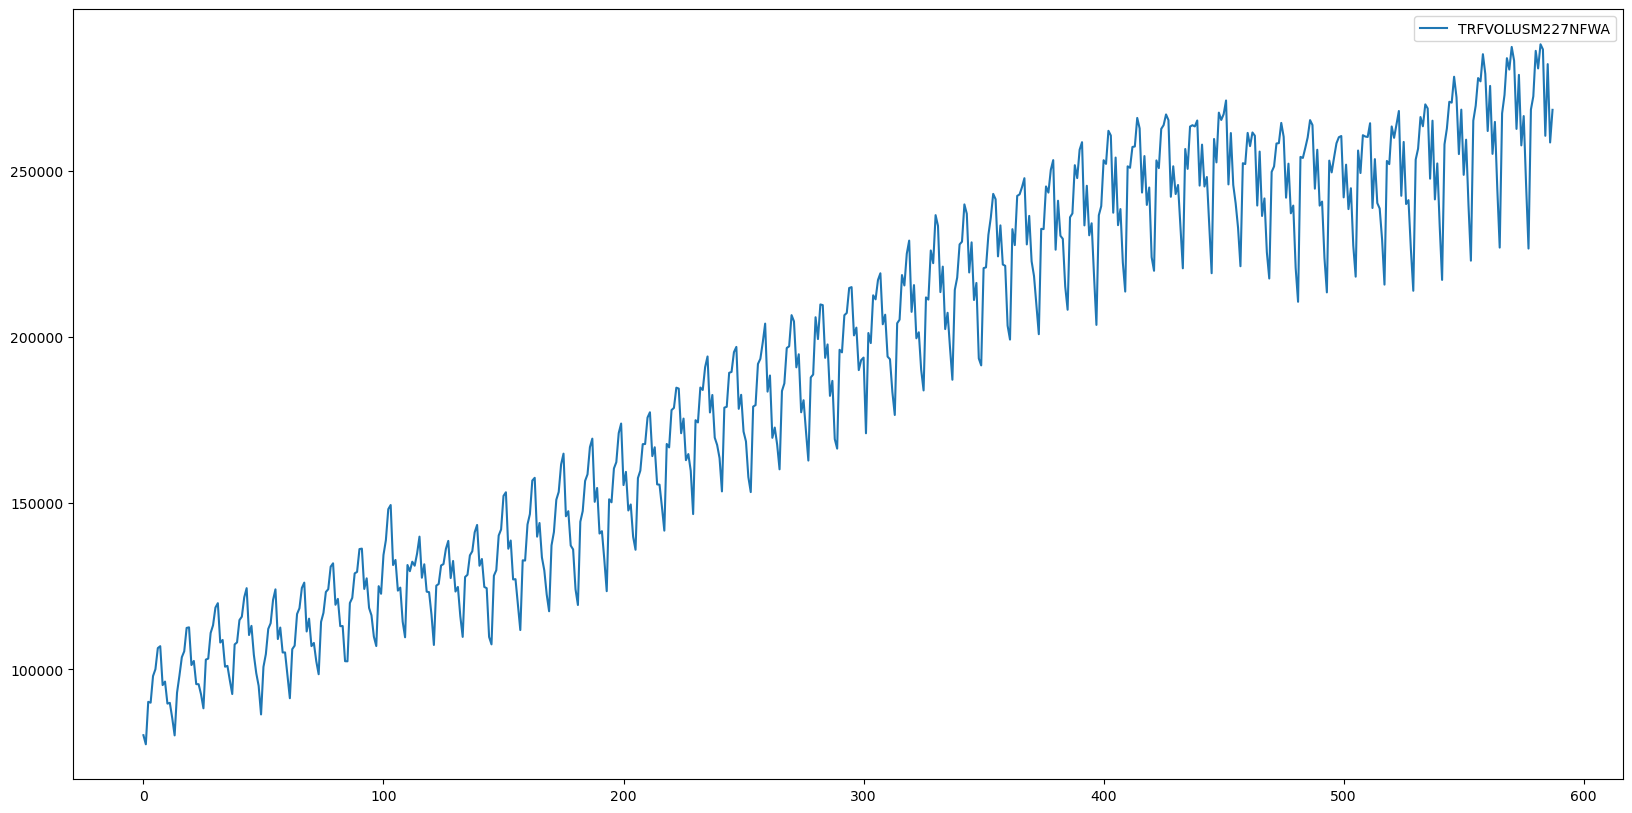

In [5]:
miles.plot(figsize=(20,10))

## Pre-processing Data

##### Manipulating Time-series Data

In [6]:
miles.set_index('DATE', inplace=True)

In [7]:
miles.index.freq = 'MS'

In [8]:
miles.rename(columns={'TRFVOLUSM227NFWA':'MILES'}, inplace=True)

In [9]:
miles

,MILES
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0
...,...
2018-08-01,286608.0
2018-09-01,260595.0
2018-10-01,282174.0


##### Splitting Data

In [10]:
miles.shape

(588, 1)

In [11]:
train = miles.iloc[:len(miles)-12]
train

,MILES
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0
...,...
2017-08-01,283184.0
2017-09-01,262673.0
2017-10-01,278937.0


In [12]:
test = miles.iloc[len(miles)-12:]
test

,MILES
DATE,
2018-01-01,245695.0
2018-02-01,226660.0
2018-03-01,268480.0
2018-04-01,272475.0
2018-05-01,286164.0
2018-06-01,280877.0
2018-07-01,288145.0
2018-08-01,286608.0
2018-09-01,260595.0


##### Scaling Data

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
sc = MinMaxScaler()

In [15]:
df_train = sc.fit_transform(train)
df_train

array([[0.0130109 ],
       [0.        ],
       [0.06089061],
       [0.05961858],
       [0.09780801],
       [0.10763646],
       [0.13792216],
       [0.14067108],
       [0.08485905],
       [0.08992334],
       [0.05832273],
       [0.0594042 ],
       [0.03760821],
       [0.01274887],
       [0.07399679],
       [0.09844641],
       [0.12488268],
       [0.13335334],
       [0.16685961],
       [0.16769811],
       [0.11361547],
       [0.11949919],
       [0.08629306],
       [0.0861025 ],
       [0.07157184],
       [0.05159575],
       [0.12140962],
       [0.12289603],
       [0.15961334],
       [0.17066617],
       [0.19605433],
       [0.20233825],
       [0.14592594],
       [0.14958957],
       [0.11123816],
       [0.11242443],
       [0.09157651],
       [0.07205778],
       [0.1431532 ],
       [0.14615462],
       [0.17806966],
       [0.18302438],
       [0.21078032],
       [0.22383886],
       [0.15669292],
       [0.16982768],
       [0.12834146],
       [0.102

In [16]:
df_test = sc.fit_transform(test)
df_test

array([[0.3095877 ],
       [0.        ],
       [0.68016589],
       [0.74514109],
       [0.96778076],
       [0.88179231],
       [1.        ],
       [0.97500203],
       [0.55192323],
       [0.90288688],
       [0.51931365],
       [0.6790762 ]])

##### Time-series Generator

In [17]:
n_input = 12
n_features = 1

In [21]:
pip install keras

     ---------------------------------------- 1.7/1.7 MB 42.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install tensorflow

  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
     ------------------------------------ 266.3/266.3 MB 313.6 kB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached tensorflow_io_gcs_filesystem-0.29.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Using cached grpcio-1.51.1-cp39-cp39-win_amd64.whl (3.7 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached termcolor-2.1.1-py3-none-any.whl (6.2 kB)
  Using cached flatbuffers-22.12.6-py2.py3-none-any.whl (26 kB)
  Using cached google_auth_oauthlib-0.

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\fg\\anaconda3\\Lib\\site-packages\\google\\protobuf\\internal\\_api_implementation.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [24]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [25]:
generator = TimeseriesGenerator(df_train, df_train, length=n_input, batch_size=1)

In [26]:
len(generator)

564

In [27]:
len(df_train)

576

In [28]:
df_train[:13]

array([[0.0130109 ],
       [0.        ],
       [0.06089061],
       [0.05961858],
       [0.09780801],
       [0.10763646],
       [0.13792216],
       [0.14067108],
       [0.08485905],
       [0.08992334],
       [0.05832273],
       [0.0594042 ],
       [0.03760821]])

In [29]:
generator[0]

(array([[[0.0130109 ],
         [0.        ],
         [0.06089061],
         [0.05961858],
         [0.09780801],
         [0.10763646],
         [0.13792216],
         [0.14067108],
         [0.08485905],
         [0.08992334],
         [0.05832273],
         [0.0594042 ]]]),
 array([[0.03760821]]))

In [30]:
generator[0][0].shape

(1, 12, 1)

## Model Training & Building 

In [31]:
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

In [32]:
model = Sequential(
    [(LSTM(50, activation='relu', input_shape=(n_input, n_features))),
     (Dense(1))])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='adam', loss='mse')

In [35]:
model.fit_generator(generator,epochs=30)

Epoch 1/30


C:\Users\fg\AppData\Local\Temp\ipykernel_14488\2198188998.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=30)


564/564 [==============================] - 3s 3ms/step - loss: 0.0240
Epoch 2/30
564/564 [==============================] - 2s 4ms/step - loss: 0.0054
Epoch 3/30
564/564 [==============================] - 2s 4ms/step - loss: 0.0053
Epoch 4/30
564/564 [==============================] - 2s 3ms/step - loss: 0.0038
Epoch 5/30
564/564 [==============================] - 2s 3ms/step - loss: 0.0032
Epoch 6/30
564/564 [==============================] - 2s 3ms/step - loss: 0.0024
Epoch 7/30
564/564 [==============================] - 2s 3ms/step - loss: 0.0024
Epoch 8/30
564/564 [==============================] - 2s 3ms/step - loss: 0.0020
Epoch 9/30
564/564 [==============================] - 2s 3ms/step - loss: 0.0018
Epoch 10/30
564/564 [==============================] - 2s 3ms/step - loss: 0.0019
Epoch 11/30
564/564 [==============================] - 2s 3ms/step - loss: 0.0019
Epoch 12/30
564/564 [==============================] - 2s 3ms/step - loss: 0.0015
Epoch 13/30
564/564 [===============

## Model Evaluation

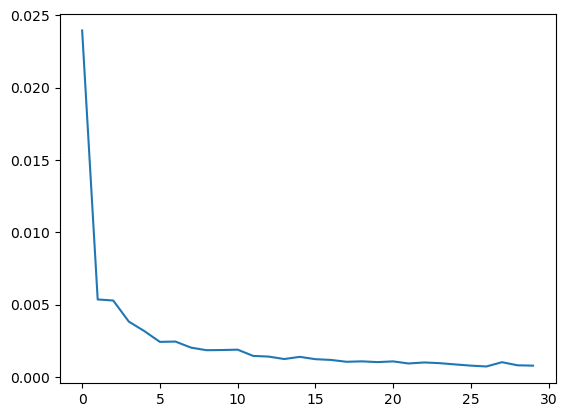

In [37]:
# plot the history of the loss that occured during training
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

##### Model Prediction

In [38]:
df_train[-n_input:]

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

In [39]:
first_eval_batch = df_train[-n_input:]

In [40]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [41]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 142ms/step


array([[0.80409086]], dtype=float32)

## Model Deployment

In [42]:
model.save('coolmodel.h5')

In [43]:
from keras.models import load_model

In [44]:
loaded = load_model('coolmodel.h5')

In [45]:
loaded.predict(first_eval_batch)

1/1 [==============================] - 0s 126ms/step


array([[0.80409086]], dtype=float32)

==========

# THANK YOU!